In [1]:
import os
from pathlib import Path
import sys
import logging

logging.basicConfig(level=logging.INFO)

In [2]:
sys.path.append('..')

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
from torch.utils.data import DataLoader, TensorDataset
from baard.classifiers import MNIST_CNN, CIFAR10_ResNet18

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpgf0cnzxi
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpgf0cnzxi/_remote_module_non_scriptable.py


In [5]:
import baard.utils.torch_utils as tr_utils

In [6]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
PATH_CHECKPOINT = os.path.join(PATH_ROOT, 'pretrained_clf')
print('ROOT:', PATH_ROOT)
print('CHECKPOINT:', PATH_CHECKPOINT)

ROOT: /home/lukec/workspace/baard_v4
CHECKPOINT: /home/lukec/workspace/baard_v4/pretrained_clf


In [7]:
def get_model(data_name):
    if data_name == 'MNIST':
        path_checkpoint = os.path.join(PATH_CHECKPOINT, 'mnist_cnn.ckpt')
        model = MNIST_CNN.load_from_checkpoint(path_checkpoint)
    elif data_name == 'CIFAR10':
        path_checkpoint = os.path.join(PATH_CHECKPOINT, 'cifar10_resnet18.ckpt')
        model = CIFAR10_ResNet18.load_from_checkpoint(path_checkpoint)
    else:
        raise NotImplementedError
    return model

In [8]:
SEED = 727328

In [9]:
def display_head(data_name, eps, norm):
    path_results = os.path.join(
        PATH_ROOT, 'results', f'exp{SEED}', data_name, f'whitebox-L{norm}-1000-{eps}.pt'
    )

    dataset = torch.load(path_results)
    X, y = tr_utils.dataset2tensor(dataset)
    tr_utils.show_top5_imgs(dataset)

    print(f'L{norm} {eps}:', torch.argmax(get_model(data_name)(X[:5]), 1).numpy())

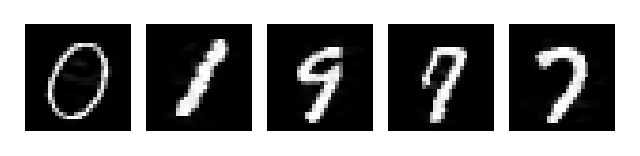

Labels: 0, 1, 9, 7, 7
L2 0.5: [0 1 9 7 7]


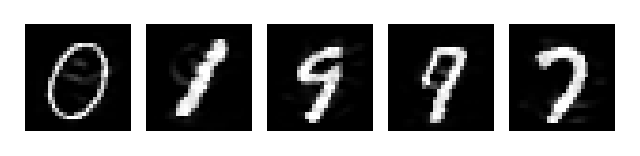

Labels: 0, 1, 9, 7, 7
L2 1.0: [0 1 9 9 7]


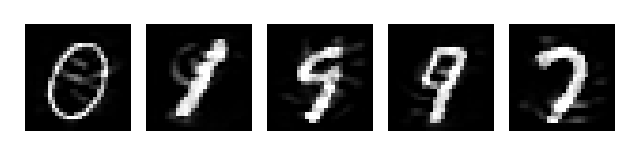

Labels: 0, 1, 9, 7, 7
L2 2.0: [8 1 5 9 7]


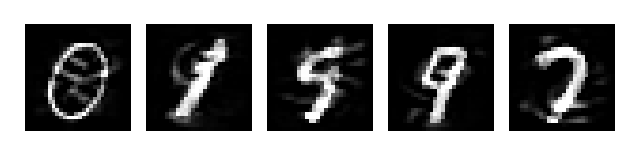

Labels: 0, 1, 9, 7, 7
L2 3.0: [8 9 5 9 2]


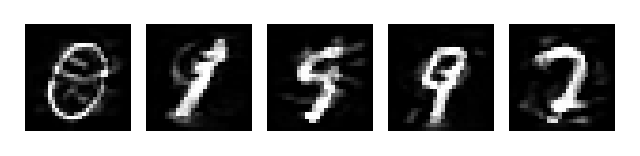

Labels: 0, 1, 9, 7, 7
L2 4.0: [8 9 5 9 2]


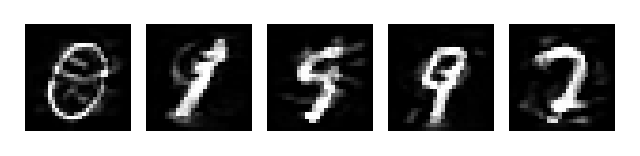

Labels: 0, 1, 9, 7, 7
L2 6.0: [8 9 5 9 2]


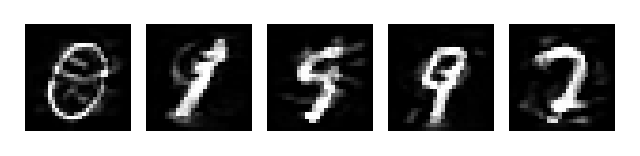

Labels: 0, 1, 9, 7, 7
L2 8.0: [8 9 5 9 2]


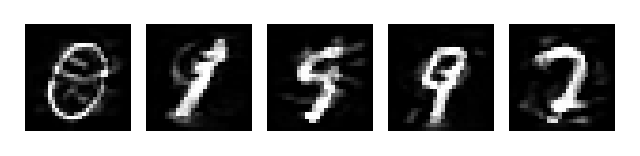

Labels: 0, 1, 9, 7, 7
L2 10.0: [8 9 5 9 2]


In [10]:
for e in np.array([0.5, 1, 2, 3, 4, 6, 8, 10]):
    display_head('MNIST', e, 2)

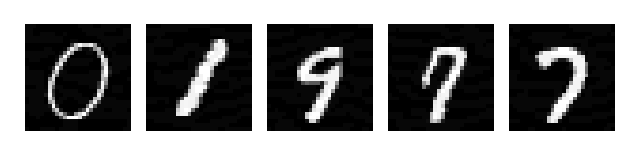

Labels: 0, 1, 9, 7, 7
Linf 0.03: [0 1 9 7 7]


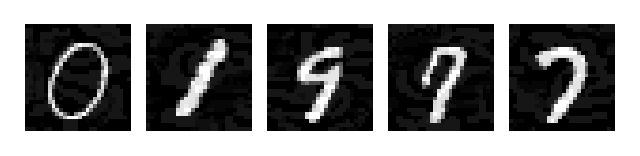

Labels: 0, 1, 9, 7, 7
Linf 0.09: [0 1 9 9 7]


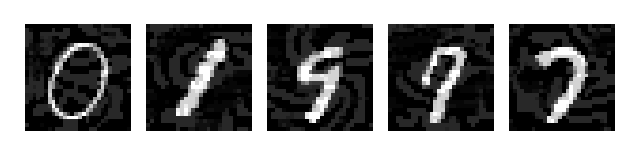

Labels: 0, 1, 9, 7, 7
Linf 0.16: [0 1 5 9 7]


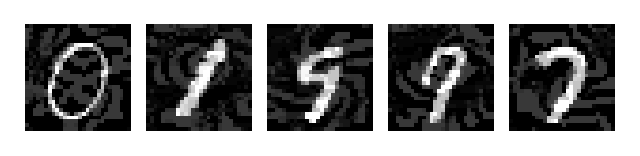

Labels: 0, 1, 9, 7, 7
Linf 0.22: [8 1 5 9 2]


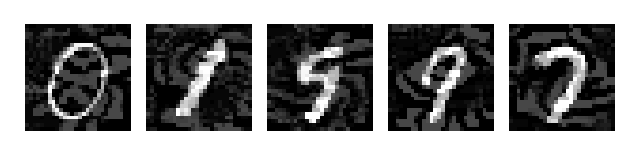

Labels: 0, 1, 9, 7, 7
Linf 0.28: [8 9 5 9 2]


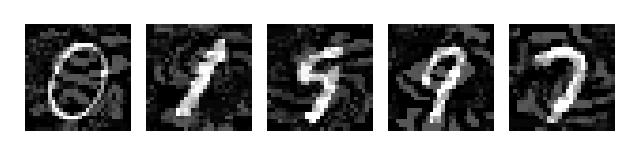

Labels: 0, 1, 9, 7, 7
Linf 0.34: [8 9 5 9 2]


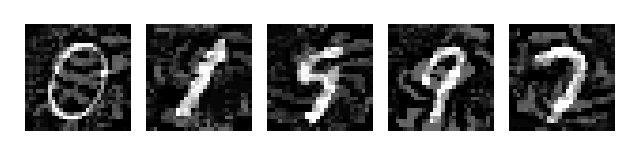

Labels: 0, 1, 9, 7, 7
Linf 0.4: [8 9 5 9 2]


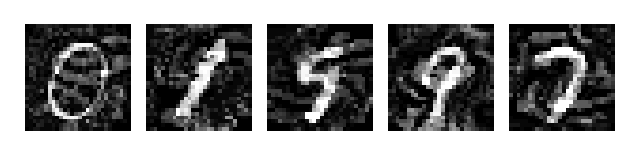

Labels: 0, 1, 9, 7, 7
Linf 0.6: [8 9 5 9 2]


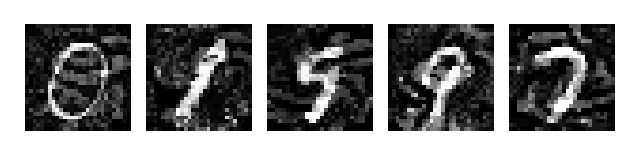

Labels: 0, 1, 9, 7, 7
Linf 0.8: [8 9 5 9 2]


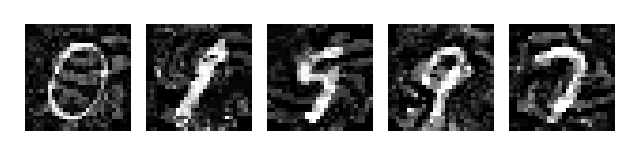

Labels: 0, 1, 9, 7, 7
Linf 1.0: [8 9 5 9 2]


In [11]:
for e in np.array([0.03, 0.09, 0.16, 0.22, 0.28, 0.34, 0.4, 0.6, 0.8, 1.0]):
    display_head('MNIST', e, 'inf')

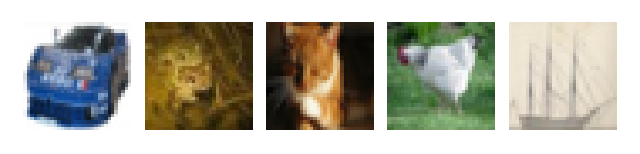

Labels: 1, 6, 3, 2, 8
L2 0.1: [1 6 3 2 8]


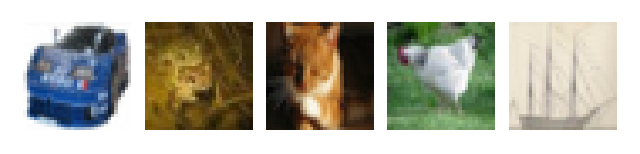

Labels: 1, 6, 3, 2, 8
L2 0.2: [1 6 7 2 8]


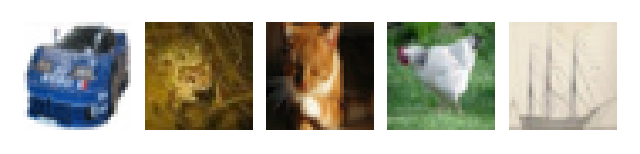

Labels: 1, 6, 3, 2, 8
L2 0.3: [1 6 7 2 0]


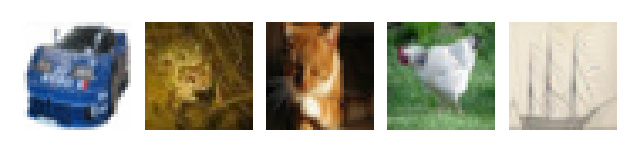

Labels: 1, 6, 3, 2, 8
L2 0.5: [1 6 7 2 0]


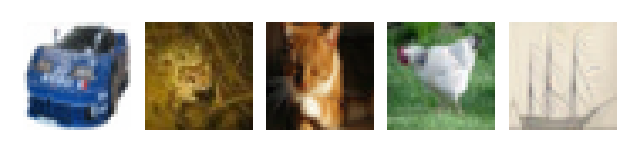

Labels: 1, 6, 3, 2, 8
L2 0.8: [1 6 7 2 0]


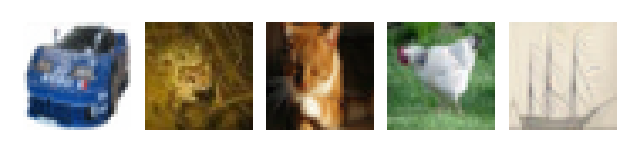

Labels: 1, 6, 3, 2, 8
L2 1.0: [1 6 7 2 0]


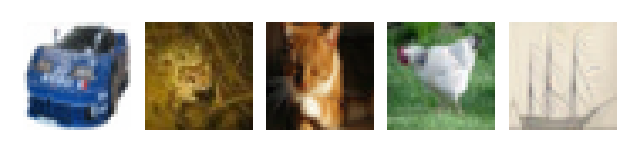

Labels: 1, 6, 3, 2, 8
L2 1.5: [1 6 7 2 0]


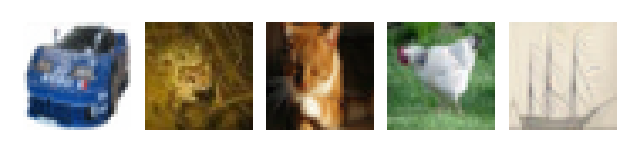

Labels: 1, 6, 3, 2, 8
L2 2.0: [1 6 7 2 0]


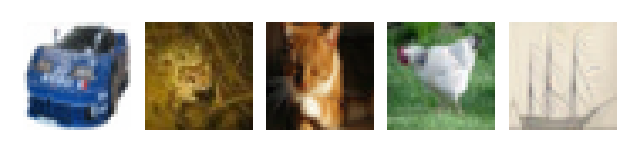

Labels: 1, 6, 3, 2, 8
L2 2.5: [1 6 7 2 0]


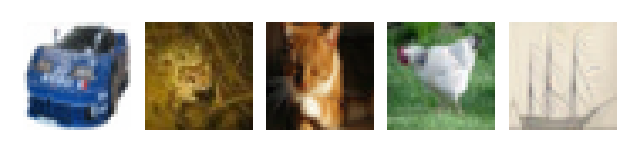

Labels: 1, 6, 3, 2, 8
L2 3.0: [1 6 7 2 0]


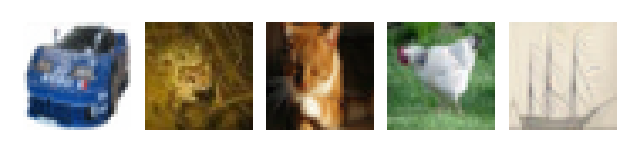

Labels: 1, 6, 3, 2, 8
L2 4.0: [1 6 7 2 0]


In [12]:
for e in np.array([0.1, 0.2, 0.3, 0.5, 0.8, 1, 1.5, 2, 2.5, 3, 4]):
    display_head('CIFAR10', e, 2)

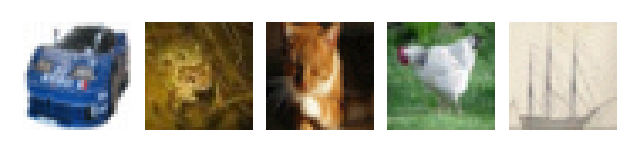

Labels: 1, 6, 3, 2, 8
Linf 0.01: [1 6 7 2 8]


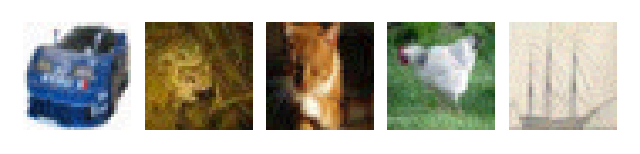

Labels: 1, 6, 3, 2, 8
Linf 0.03: [1 6 7 5 8]


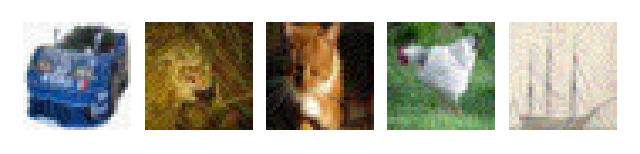

Labels: 1, 6, 3, 2, 8
Linf 0.05: [1 6 7 2 8]


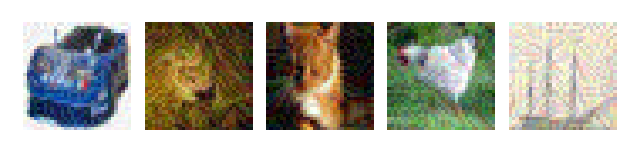

Labels: 1, 6, 3, 2, 8
Linf 0.1: [1 6 7 2 8]


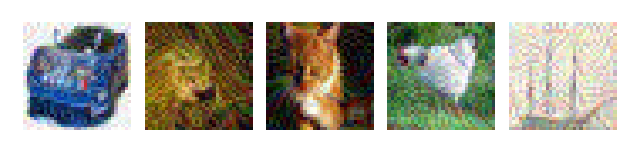

Labels: 1, 6, 3, 2, 8
Linf 0.15: [9 6 7 2 8]


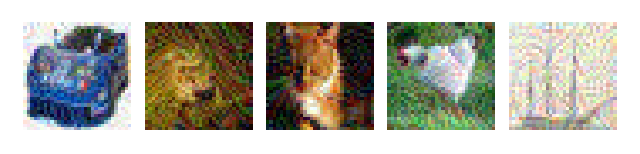

Labels: 1, 6, 3, 2, 8
Linf 0.2: [1 6 7 2 8]


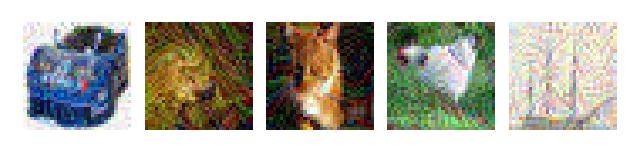

Labels: 1, 6, 3, 2, 8
Linf 0.3: [1 6 7 2 8]


In [13]:
for e in np.array([0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.3]):
    display_head('CIFAR10', e, 'inf')